In [592]:
# !pip install pandas numpy scikit-learn seaborn matplotlib scipy imbalanced-learn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy import stats

### 1) –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [49]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

### 2) –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [51]:
train_data.head(20)

id  Marital status  Application mode  Application order  Course  \
0    0               1                 1                  1    9238   
1    1               1                17                  1    9238   
2    2               1                17                  2    9254   
3    3               1                 1                  3    9500   
4    4               1                 1                  2    9500   
5    5               1                39                  1     171   
6    6               1                44                  1    9085   
7    7               1                 1                  1    9773   
8    8               1                39                  1    9003   
9    9               1                 1                  6    9500   
10  10               1                17                  1    9238   
11  11               1                 1                  1    9773   
12  12               1                 1                  1    9853   
13  13               2                39                  1    9147   
14  14               1                39                  1    9003   
15  15               1                 1                  2    9670   
16  16               1                 1                  1     171   
17  17               1                17                  1    9238   
18  18               1                39                  1    9500   
19  19               1                 1                  3    9500   

    Daytime/evening attendance  Previous qualification  \
0                            1                       1   
1                            1                       1   
2                            1                       1   
3                            1                       1   
4                            1                       1   
5                            1                      19   
6                            1                      39   
7                            1                       1   
8                            1                       1   
9                            1                       1   
10                           1                       1   
11                           1                       1   
12                           1                       1   
13                           1                      19   
14                           1                       1   
15                           1                       1   
16                           1                       1   
17                           1                       1   
18                           1                       1   
19                           1                       1   

    Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                            126.0            1                       1  ...   
1                            125.0            1                      19  ...   
2                            137.0            1                       3  ...   
3                            131.0            1                      19  ...   
4                            132.0            1                      19  ...   
5                            133.1            1                      19  ...   
6                            130.0            1                      37  ...   
7                            130.0            1                      19  ...   
8                            133.1            1                      19  ...   
9                            135.0            1                      37  ...   
10                           120.0            1                       1  ...   
11                           140.0            1                      37  ...   
12                           154.0            1                      37  ...   
13                           133.1            1                      37  ...   
14                           130.0            1                      19  ...   
15           

In [52]:
train_data['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

–í —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –µ—Å—Ç—å 3 –∫–ª–∞—Å—Å–∞. –ö–ª–∞—Å—Å—ã –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã. –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –æ—á–µ–≤–∏–¥–Ω–æ, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è, –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫.

In [57]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∏
train_data.isna().sum().sort_values(ascending=False)

id                                                0
Curricular units 2nd sem (credited)               0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (enrolled)               0
Marital status                                    0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Age at enrollment                                 0
Scholarship 

In [59]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –¥—É–±–ª–∏–∫–∞—Ç—ã
train_data.duplicated().sum()

0

In [60]:
# –ü—ã—Ç–∞–µ–º—Å—è –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, —Å–∫–æ–ª—å–∫–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É –Ω–∞—Å –µ—Å—Ç—å.
# –ü–æ–¥–æ–±—Ä–∞–ª –ø–æ–∏—Å–∫–æ–º –∏ –∞–Ω–∞–ª–∏–∑–æ–º –ø—Ä–∏–º–µ—Ä–Ω—É—é –≤–µ–ª–∏—á–∏–Ω—É —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–≤–µ—Å—Ç–∏ —ç—Ç—É –≥—Ä–∞–Ω–∏—Ü—É
cat_cols = [col for col in train_data.columns if train_data[col].nunique() <= 19]

num_cols = [col for col in train_data.columns if train_data[col].nunique() >= 20]

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∏ –≤—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
for col in cat_cols:
    unique_values = train_data[col].unique()
    print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'{col}': {unique_values}")

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∏ –≤—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
for col in num_cols:
    unique_values = train_data[col].unique()
    print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'{col}': {unique_values}")

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Marital status': [1 2 4 3 5 6]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Application order': [1 2 3 6 4 5 0 9]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Course': [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Daytime/evening attendance': [1 0]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Nacionality': [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'Displaced': [0 1]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ –∫–

In [63]:
# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

# –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]

print("–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:")
for column in categorical_columns:
    print(column)

print("\n")

print("–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:")
for column in numerical_columns:
    print(column)

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


## 3) –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –ø–æ–¥—Ö–æ–¥ –∫ –ø–æ–∏—Å–∫—É –≤—ã–±—Ä–æ—Å–æ–≤

In [66]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç–æ–¥ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ (IQR) –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
# –í—ã–±—Ä–æ—Å—ã –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–∞—Ö–æ–¥—è—â–∏–µ—Å—è –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ Q1 - 1.5 * IQR –∏ Q3 + 1.5 * IQR

def find_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫ —á–∏—Å–ª–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∏ –≤—ã–≤–æ–¥ —Ç–æ–ª—å–∫–æ —Ç–µ—Ö, –≥–¥–µ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã
outliers = {}
for column in numerical_columns:  
    outlier_data = find_outliers_iqr(train_data, column)
    if not outlier_data.empty:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –≤—ã–±—Ä–æ—Å—ã
        outliers[column] = outlier_data

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ —Å—Ç–æ–ª–±—Ü—ã —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
for column, outlier_data in outliers.items():
    print(f"–í—ã–±—Ä–æ—Å—ã –≤ —Å—Ç–æ–ª–±—Ü–µ '{column}':")
    print(outlier_data[[column]]) 

–í—ã–±—Ä–æ—Å—ã –≤ —Å—Ç–æ–ª–±—Ü–µ 'Previous qualification (grade)':
       Previous qualification (grade)
69                              100.0
77                              168.0
189                             100.0
292                             175.0
325                             100.0
...                               ...
76343                           100.0
76392                           100.0
76412                           100.0
76418                           165.0
76459                           170.0

[1364 rows x 1 columns]
–í—ã–±—Ä–æ—Å—ã –≤ —Å—Ç–æ–ª–±—Ü–µ 'Admission grade':
       Admission grade
29               170.0
33               154.0
68               160.0
76               160.0
77               166.0
...                ...
76456            157.7
76459            166.6
76468             95.5
76480             95.0
76510            153.6

[2577 rows x 1 columns]
–í—ã–±—Ä–æ—Å—ã –≤ —Å—Ç–æ–ª–±—Ü–µ 'Age at enrollment':
       Age at enrollment
16                  

In [67]:
print(f'–í—ã–±—Ä–æ—Å—ã –ø–æ IQR –≤ —Å—Ç—Ä–æ–∫–∞—Ö {len(outlier_data)} –∏–∑ {len(train_data[numerical_columns])}')

–í—ã–±—Ä–æ—Å—ã –ø–æ IQR –≤ —Å—Ç—Ä–æ–∫–∞—Ö 2146 –∏–∑ 76518


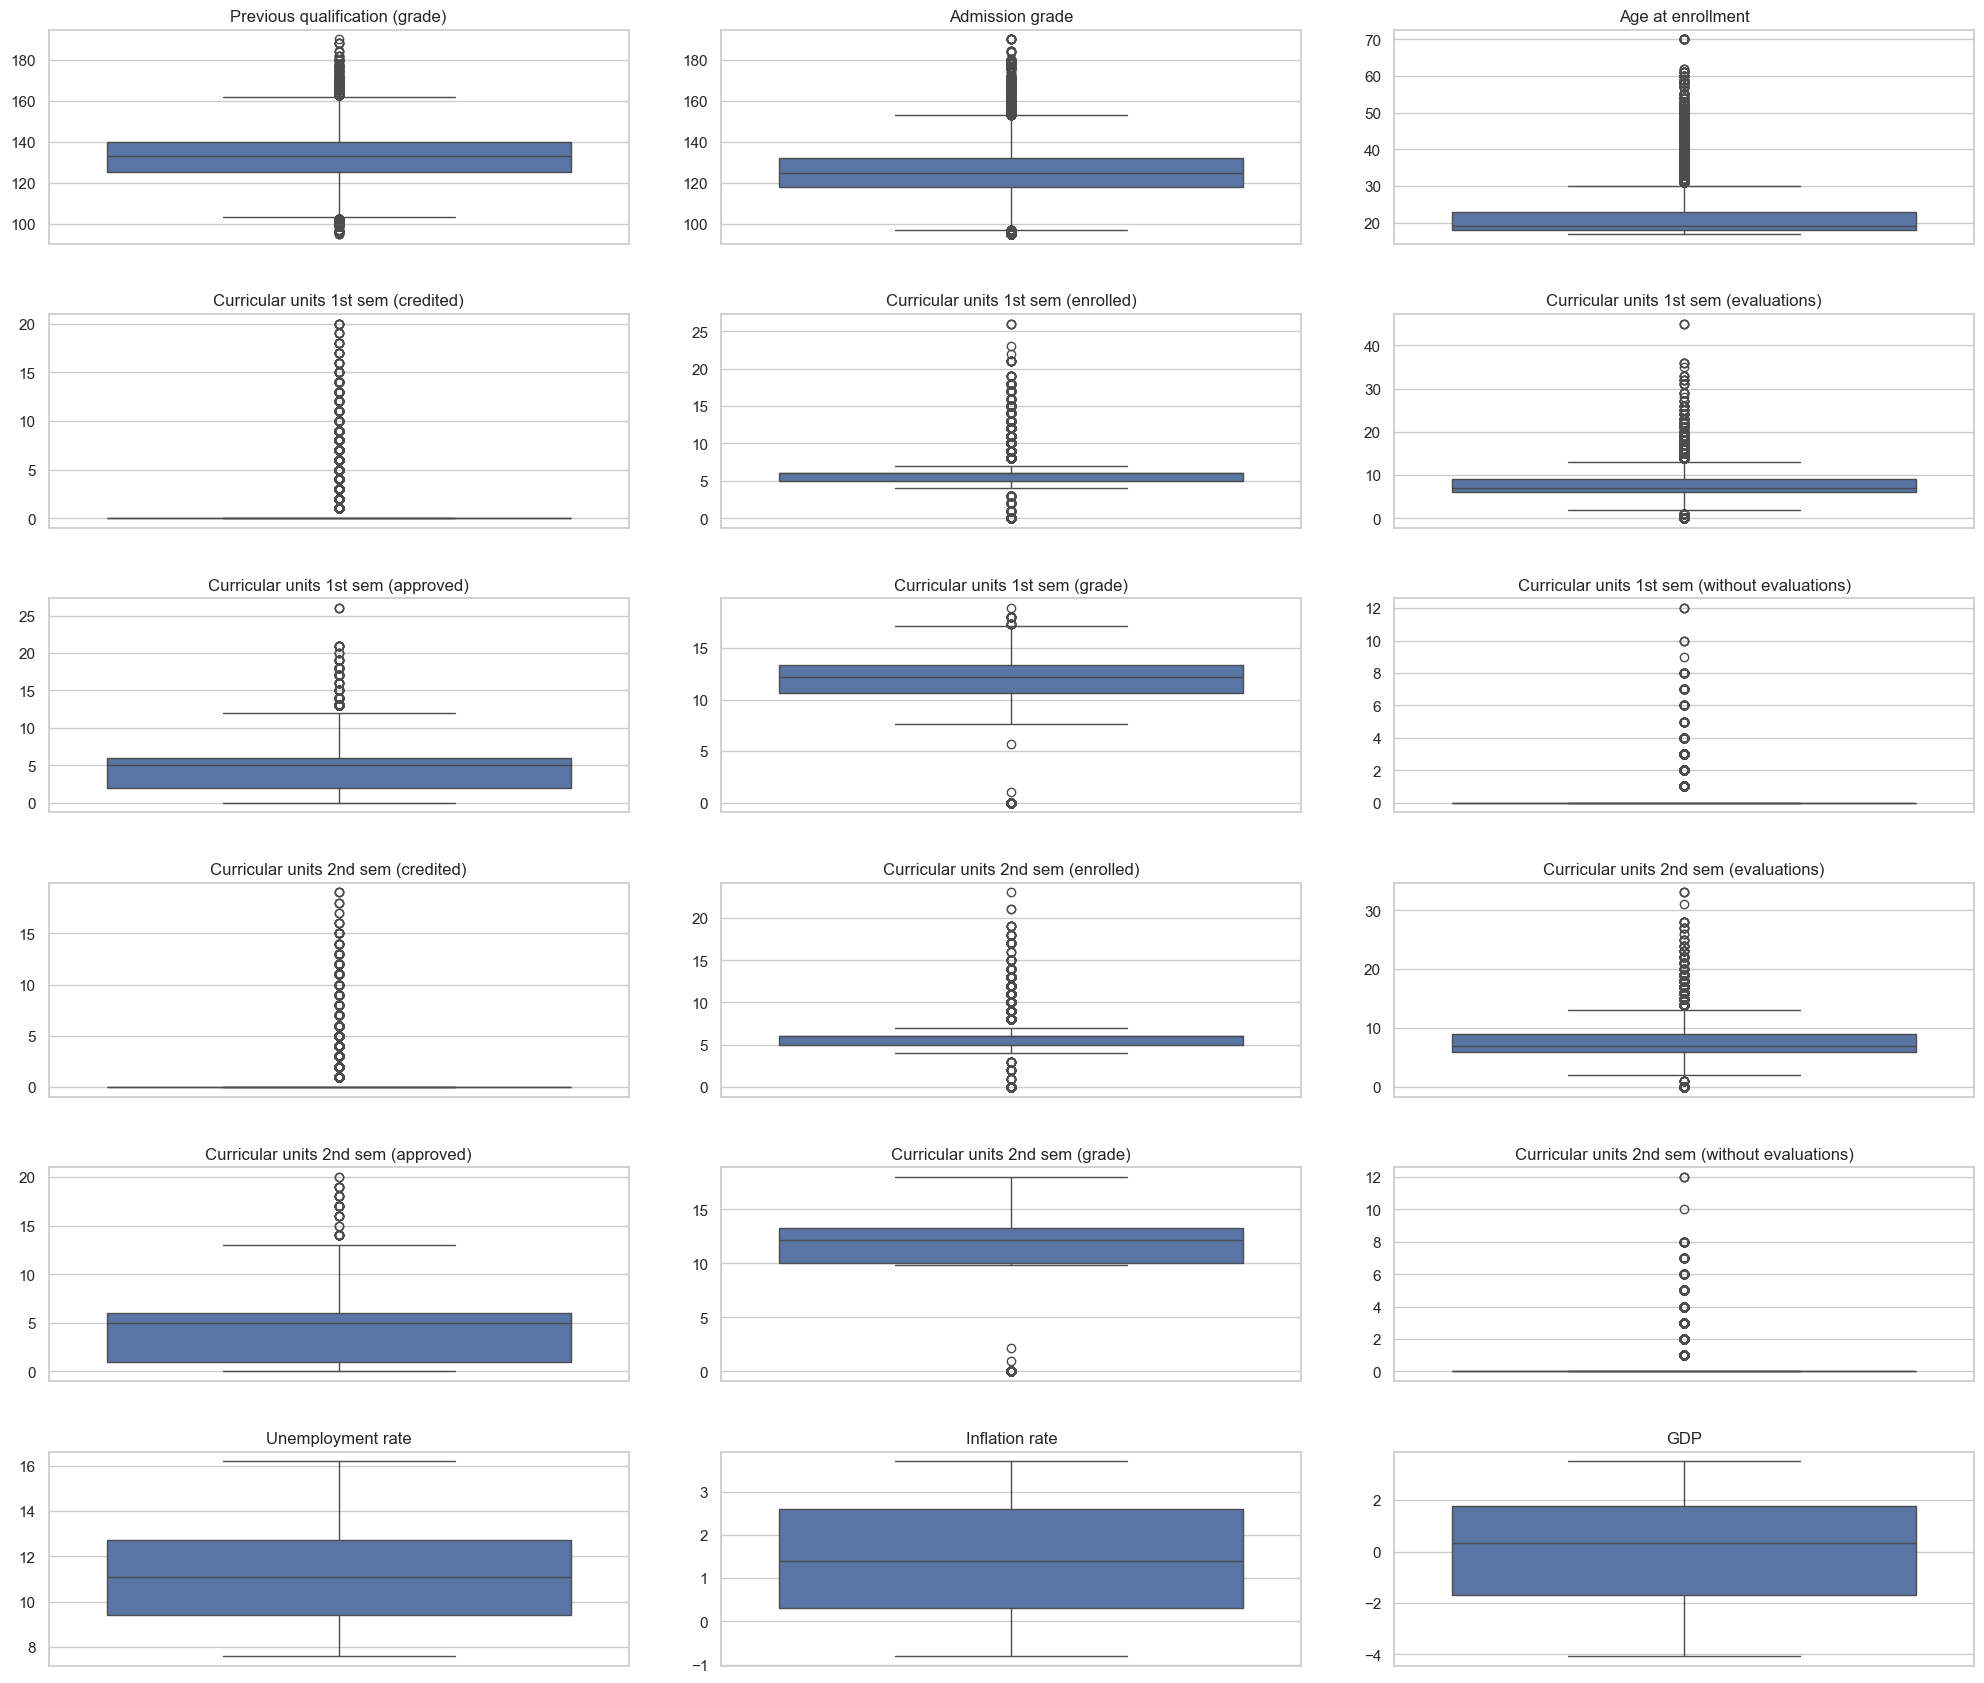

In [70]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
sns.set(style="whitegrid")

num_features = len(numerical_columns)
cols = 3
rows = (num_features + cols - 1) // cols

# –°–æ–∑–¥–∞–Ω–∏–µ —è—â–∏–∫–æ–≤ —Å —É—Å–∞–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
plt.figure(figsize=(20, 17))
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # –ù–∞—Å—Ç—Ä–æ–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    sns.boxplot(y=train_data[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout(pad=1.08, h_pad=3, w_pad=3)
plt.show()

## 4) –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ DBSCAN –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤

–î–ª—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ DBSCAN —Ä–µ—à–∞—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–º–µ–µ—Ç –≤—ã–±–æ—Ä –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ eps –∏ min_samples. 
–ü–∞—Ä–∞–º–µ—Ç—Ä eps –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –¥–≤—É–º—è –≤—ã–±–æ—Ä–∫–∞–º–∏, —á—Ç–æ–±—ã –æ–¥–Ω–∞ –∏–∑ –Ω–∏—Ö —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞—Å—å –∫–∞–∫ —Å–æ—Å–µ–¥–Ω—è—è —Å –¥—Ä—É–≥–æ–π. –ú–µ–Ω—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ eps –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é –±–æ–ª—å—à–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–æ–∂–µ—Ç –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∫–ª–∞—Å—Ç–µ—Ä—ã.

In [73]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_data[numerical_columns])

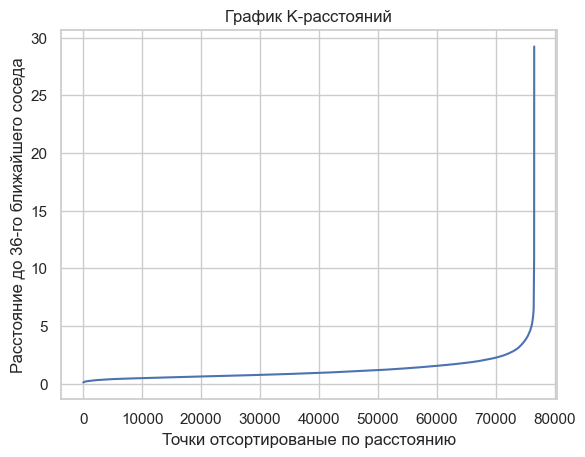

In [74]:
# –û–±—â–∏–º —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ–º –¥–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ min_samples —è–≤–ª—è–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ 
# —Ä–∞–≤–Ω–æ 2  √ó ùê∑ , –≥–¥–µ  D - —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–º–µ—Ä–µ–Ω–∏–π –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. 
# –≠—Ç–æ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç –Ω–∞–ª–∏—á–∏–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ—á–µ–∫ –≤ –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –ø–ª–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏
min_samples = 2 * len(numerical_columns)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
nn_model = NearestNeighbors(n_neighbors=min_samples)
nn_model.fit(data_scaled)
distances, _ = nn_model.kneighbors(data_scaled)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
distances = np.sort(distances[:, min_samples-1], axis=0)

# –í–∏–∑–∞—É–ª–∏–∑–∞—Ü–∏—è
plt.plot(distances)
plt.title('–ì—Ä–∞—Ñ–∏–∫ K-—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π')
plt.xlabel('–¢–æ—á–∫–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã–µ –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é')
plt.ylabel(f'–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ {min_samples}-–≥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ —Å–æ—Å–µ–¥–∞')
plt.show()

–¢–æ—á–∫–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ, –≥–¥–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–µ–∑–∫–æ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å—Å—è —á–∞—Å—Ç–æ –Ω–∞–∑—ã–≤–∞—é—Ç "–∫–æ–ª–µ–Ω–æ–º" –∏–ª–∏ "–ª–æ–∫—Ç–µ–º" –∫—Ä–∏–≤–æ–π.
–ò–¥–µ—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –¥–æ —ç—Ç–æ–π —Ç–æ—á–∫–∏ —Ç–æ—á–∫–∏ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–ª–∏–∑–∫–æ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É (—á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –ø–ª–æ—Ç–Ω—ã–µ –æ–±–ª–∞—Å—Ç–∏), –∞ –ø–æ—Å–ª–µ —ç—Ç–æ–π —Ç–æ—á–∫–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç—Å—è (—á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–µ –æ–±–ª–∞—Å—Ç–∏).
–û–ø—Ä–µ–¥–µ–ª–∏–≤ —Ç–æ—á–∫—É –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è,–º—ã –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å–≤–æ–µ–≥–æ eps.
–ß–∞—Å—Ç–æ –±—ã–≤–∞–µ—Ç –ø–æ–ª–µ–∑–Ω–æ –≤—ã–±—Ä–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ–º–Ω–æ–≥–æ –Ω–∏–∂–µ —ç—Ç–æ–π —Ç–æ—á–∫–∏ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å –∑–∞—Ö–≤–∞—Ç –±–æ–ª—å—à–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ—á–µ–∫ –≤ –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö.

In [76]:
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ DBSCAN
dbscan = DBSCAN(eps=3, min_samples=min_samples, n_jobs=-1)
clusters = dbscan.fit_predict(data_scaled)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –≤ DataFrame
train_data['Cluster'] = clusters

# –í—ã–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ (—à—É–º –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è –∫–∞–∫ -1)
outliers_dbscan = train_data[train_data['Cluster'] == -1]

train_data['Cluster']

0        0
1        0
2        0
3        0
4        0
        ..
76513    0
76514    0
76515    0
76516    0
76517    0
Name: Cluster, Length: 76518, dtype: int64

In [77]:
print(f'–í—ã–±—Ä–æ—Å—ã –ø–æ DBSCAN –≤ —Å—Ç—Ä–æ–∫–∞—Ö {len(outliers_dbscan)} –∏–∑ {len(train_data[numerical_columns])}')

–í—ã–±—Ä–æ—Å—ã –ø–æ DBSCAN –≤ —Å—Ç—Ä–æ–∫–∞—Ö 1595 –∏–∑ 76518


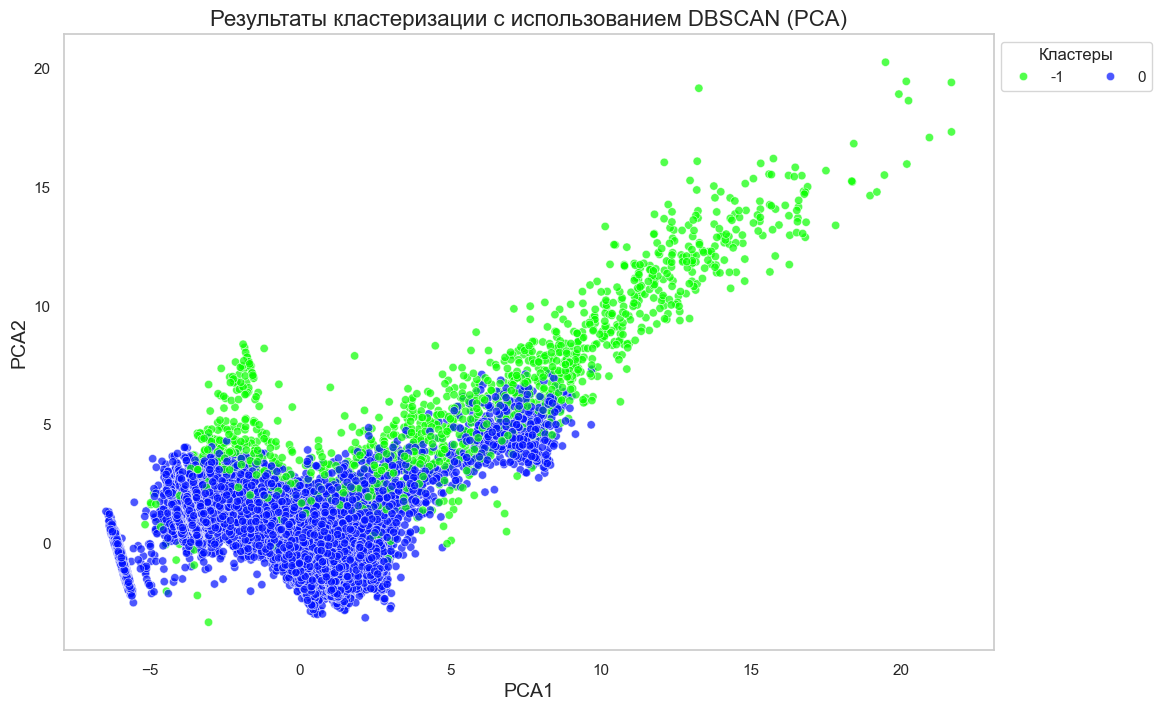

In [78]:
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ PCA –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
pca_df = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", len(pca_df['Cluster'].unique()))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette=palette, legend='full', alpha=0.7)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –º–µ—Ç–æ–∫ –æ—Å–µ–π
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º DBSCAN (PCA)', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.legend(title='–ö–ª–∞—Å—Ç–µ—Ä—ã', loc="upper left", bbox_to_anchor=(1,1), ncols=15)
plt.grid()
plt.show()

## 5) –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

### –î–æ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X = train_data.drop('Target', axis=1)
y = train_data['Target']

# –†–µ—à–∏—Ç—å –ø—Ä–æ–±–ª–µ–º—É –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
log_reg = LogisticRegression(solver='liblinear', max_iter=3500, random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º One-vs-Rest –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = ovr_classifier.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

     Dropout       0.88      0.75      0.81      7223
    Enrolled       0.70      0.71      0.71      7201
    Graduate       0.76      0.87      0.82      7346

    accuracy                           0.78     21770
   macro avg       0.78      0.78      0.78     21770
weighted avg       0.78      0.78      0.78     21770



### –ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
without_outliers = train_data[train_data['Cluster'] > -1]
without_outliers = without_outliers.drop('Cluster', axis=1)
X = without_outliers.drop('Target', axis=1)
y = without_outliers['Target']

# –†–µ—à–∏—Ç—å –ø—Ä–æ–±–ª–µ–º—É –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
log_reg = LogisticRegression(solver='liblinear', max_iter=3500, random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º One-vs-Rest –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = ovr_classifier.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

     Dropout       0.90      0.74      0.81      7244
    Enrolled       0.70      0.75      0.73      7059
    Graduate       0.78      0.87      0.82      7112

    accuracy                           0.79     21415
   macro avg       0.80      0.79      0.79     21415
weighted avg       0.80      0.79      0.79     21415

